# Taller de Segmentación RFM

En este notebook aprenderemos a realizar una segmentación RFM completa paso a paso. Se utilizarán datos de transacciones y se explicará cada parte del proceso. ¡Sigue las instrucciones y ejecuta cada celda para ir avanzando!

In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/Case%201_Online%20Retail.xlsx%20-%20Online%20Retail.csv.zip
!unzip "Case 1_Online Retail.xlsx - Online Retail.csv.zip"

--2025-10-30 13:17:51--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/Case%201_Online%20Retail.xlsx%20-%20Online%20Retail.csv.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/Case%201_Online%20Retail.xlsx%20-%20Online%20Retail.csv.zip [following]
--2025-10-30 13:17:52--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/Case%201_Online%20Retail.xlsx%20-%20Online%20Retail.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Le

## 1. Preparación de Datos

Primero, cargaremos la librería necesaria y prepararemos los datos. Para este ejemplo, vamos a simular un DataFrame similar a una tabla de transacciones.

Ejecuta la siguiente celda y revisa el DataFrame resultante.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de seaborn
sns.set(style='whitegrid')

In [3]:
df = pd.read_csv('Case 1_Online Retail.xlsx - Online Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850.0,United Kingdom


Convierta la variable InvoiceDate en tipo datetime con pd.to_datetime()

In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%y %H:%M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,"2,55",17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,"2,75",17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom


### 2. Limpieza y Enriquecimiento de los Datos

En esta sección, eliminamos filas con `CustomerID` nulo (si existieran) y registros con cantidades negativas o cero. Además, crearemos una nueva columna `TotalPrice` que es el producto de `Quantity` y `UnitPrice`.

Eliminar las filas con CustomerID nulo

In [5]:
pd.isnull(df['CustomerID'])

,CustomerID
0,False
1,False
2,False
3,False
4,False
...,...
541904,False
541905,False
541906,False
541907,False


Eliminar registros con Quantity <= 0

In [ ]:
df = df[df['Quantity'] > 0]
df.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,"2,55",17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,"2,75",17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,"7,65",17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,"4,25",17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,"1,85",17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,"1,85",17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,"1,69",13047.0,United Kingdom


Asegure que Price este en float sino lo esta cambielo usando esto.   df["UnitPrice"] = df["UnitPrice"].apply(lambda x:x.replace(",","."))
df["UnitPrice"] = df["UnitPrice"].astype(float)

¿Que estoy haciendo ?

In [6]:
df["UnitPrice"] = df["UnitPrice"].astype(str).apply(lambda x:x.replace(",","."))
df["UnitPrice"] = df["UnitPrice"].astype(float)

Crear columna TotalPrice

In [7]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## 3. Cálculo de las Métricas RFM

Calcularemos las siguientes métricas para cada cliente:

- **Recencia (R):** Días transcurridos desde la última compra hasta la fecha de corte.
- **Frecuencia (F):** Número de facturas únicas realizadas por el cliente.
- **Monetario (M):** Total gastado por el cliente.

Primero, definamos la fecha de snapshot (fecha de corte).

Definir la fecha de snapshot (por ejemplo, un día después del último registro)


In [11]:
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

### 3.1 Agrupación por Cliente y Cálculo de R, F y M

Agruparemos el DataFrame por `CustomerID` y calcularemos:

- **Recency:** Días entre el `snapshot_date` y la última `InvoiceDate` de cada cliente.
- **Frecuencia:** Número único de facturas (`InvoiceNo`).
- **Monetario:** Suma de `TotalPrice`.

Utilice grupby con agg (lambda x: (snapshot_date - x.max()).days, nunique, sum )

In [14]:
rfm = df.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda x: (snapshot_date - x.max()).days),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('TotalPrice', 'sum')
)

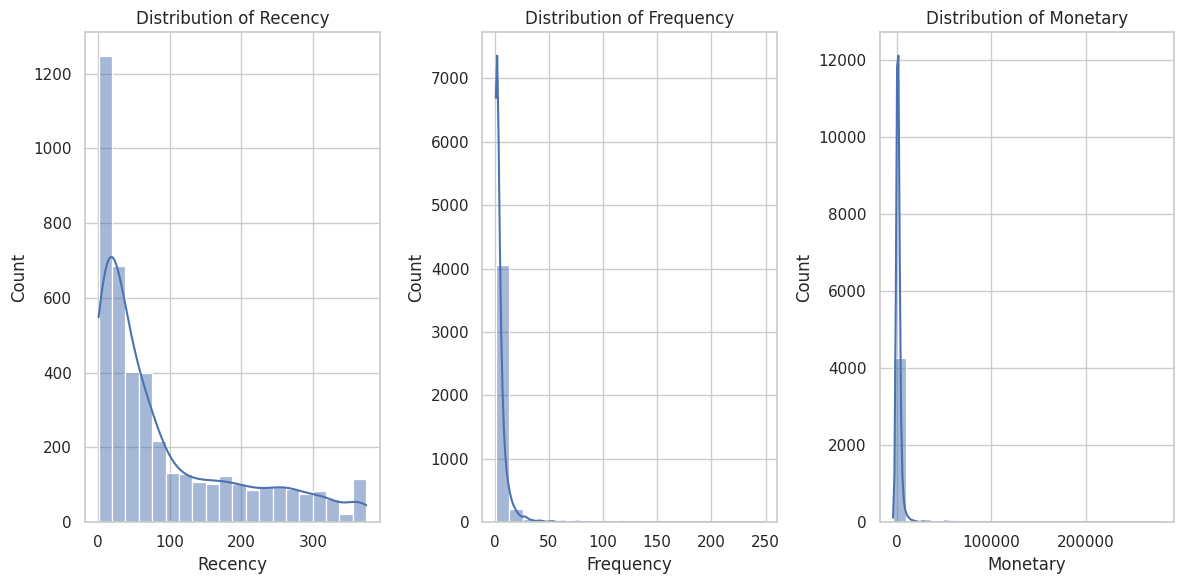

In [15]:
# Histograms of RFM metrics
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=20, kde=True)
plt.title('Distribution of Recency')

plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=20, kde=True)
plt.title('Distribution of Frequency')

plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], bins=20, kde=True)
plt.title('Distribution of Monetary')

plt.tight_layout()
plt.show()

In [18]:
# This code is no longer needed as UnitPrice has already been cleaned and converted to float.
# df["UnitPrice"] = df["UnitPrice"].apply(lambda x:x.replace(",","."))
# df["UnitPrice"] = df["UnitPrice"].astype(float)

Renombre las Columnas de manera correspondiente

In [22]:
# Assign R, F, and M scores using quartiles
rfm['R_score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1], duplicates='drop')
rfm['F_score'] = pd.cut(rfm['Frequency'], bins=4, labels=[1, 2, 3, 4], duplicates='drop')
rfm['M_score'] = pd.cut(rfm['Monetary'], bins=4, labels=[1, 2, 3, 4], duplicates='drop')

# Display the first few rows with scores
print("Tabla RFM con puntajes:")
display(rfm.head())

Tabla RFM con puntajes:


,Recency,Frequency,Monetary,R_score,F_score,M_score
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,7,4310.00,4,1,1
12348.0,75,4,1797.24,2,1,1
12349.0,19,1,1757.55,3,1,1
12350.0,310,1,334.40,1,1,1


## 4. Asignación de Puntajes RFM

Ahora, vamos a asignar puntajes a cada una de las métricas usando cuartiles. Para **Recency** asignaremos de forma inversa (más bajo es mejor) y para **Frecuencia** y **Monetario** de forma directa.


Asignar puntajes usando pd.qcut
https://pandas.pydata.org/docs/reference/api/pandas.qcut.html
Tenga en cuent si encesita duplicates= "drop" en algun momento
Y cuando los labels serian 1,2,3,4 y cuando 4,3,2,1

In [24]:
# Assign R, F, and M scores using quartiles
rfm['R_score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1], duplicates='drop')
rfm['F_score'] = pd.cut(rfm['Frequency'], bins=4, labels=[1, 2, 3, 4], duplicates='drop')
rfm['M_score'] = pd.cut(rfm['Monetary'], bins=4, labels=[1, 2, 3, 4], duplicates='drop')

# Display the first few rows with scores
print("Tabla RFM con puntajes:")
display(rfm.head())

Tabla RFM con puntajes:


,Recency,Frequency,Monetary,R_score,F_score,M_score
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,7,4310.00,4,1,1
12348.0,75,4,1797.24,2,1,1
12349.0,19,1,1757.55,3,1,1
12350.0,310,1,334.40,1,1,1


Cree RFM_Score que sea la concatenacion de texto de los anteriores score

In [28]:
rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

In [33]:
def segment_me(row):
    # Convertir los puntajes a enteros para comparación
    r = int(row['R_score'])
    f = int(row['F_score'])
    m = int(row['M_score'])

    if r >= 3 and f >= 3 and m >= 3:
        return 'Champions'
    elif f >= 3 and m >= 2:
        return 'Loyal Customers'
    elif r >= 3 and f in [2,3] and m in [2,3]:
        return 'Potential Loyalist'
    elif r in [1,2] and f in [1,2]:
        return 'At Risk'
    else:
        return 'Others'

In [32]:
rfm['Segment'] = rfm.apply(segment_me, axis=1)

# Display the first few rows with segments
print("Tabla RFM con segmentos:")
display(rfm.head())

Tabla RFM con segmentos:


,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,At Risk
12347.0,2,7,4310.00,4,1,1,411,Others
12348.0,75,4,1797.24,2,1,1,211,At Risk
12349.0,19,1,1757.55,3,1,1,311,Others
12350.0,310,1,334.40,1,1,1,111,At Risk


## 5. Definición de Segmentos

Con los puntajes asignados, podemos definir segmentos de clientes. Por ejemplo, podemos identificar:

- **Champions:** Clientes con puntajes altos en R, F y M (por ejemplo, `R_score >= 3`, `F_score >= 3`, `M_score >= 3`).
- **Loyal Customers:** Clientes leales que compran frecuentemente y tienen un gasto moderado a alto.
- **Potential Loyalist:** Clientes que muestran potencial, pero que aún no alcanzan los niveles de los Champions.
- **At Risk:** Clientes con puntajes bajos en recencia y frecuencia, lo que indica riesgo de abandono.

Puedes personalizar estos criterios según tu caso de negocio.

Ejecuta la siguiente celda para asignar segmentos.
 tiene que aplicarlo en una columna en su df
rfm['Segment'] = rfm.apply(segment_me, axis=1)


In [ ]:
def segment_me(row):
    # Convertir los puntajes a enteros para comparación
    r = int(row['R_score'])
    f = int(row['F_score'])
    m = int(row['M_score'])

    if r >= 3 and f >= 3 and m >= 3:
        return 'Champions'
    elif f >= 3 and m >= 2:
        return 'Loyal Customers'
    elif r >= 3 and f in [2,3] and m in [2,3]:
        return 'Potential Loyalist'
    elif r in [1,2] and f in [1,2]:
        return 'At Risk'
    else:
        return 'Others'



Tabla RFM con segmentos:


,Recency,Frequency,Monetary,R_score,M_score,F_score,RFM_Score,Segment
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,At Risk
12347.0,2,7,4310.00,4,4,3,434,Champions
12348.0,75,4,1797.24,2,4,2,224,At Risk
12349.0,19,1,1757.55,3,4,1,314,Others
12350.0,310,1,334.40,1,2,1,112,At Risk
...,...,...,...,...,...,...,...,...
18280.0,278,1,180.60,1,1,1,111,At Risk
18281.0,181,1,80.82,1,1,1,111,At Risk
18282.0,8,3,176.60,4,1,2,421,Others


## 6. Visualizaciones

A continuación, crearemos algunas gráficas para visualizar la distribución de las métricas RFM y la cantidad de clientes por segmento.

### 6.1 Histogramas de Recency, Frequency y Monetary

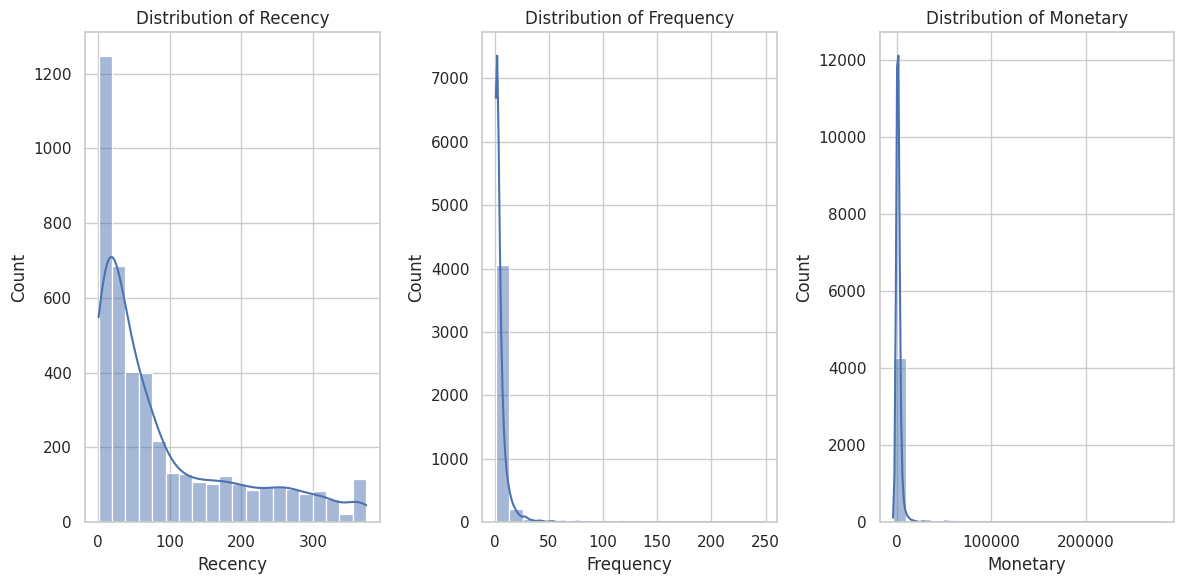

In [34]:
# Histograms of RFM metrics
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=20, kde=True)
plt.title('Distribution of Recency')

plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=20, kde=True)
plt.title('Distribution of Frequency')

plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], bins=20, kde=True)
plt.title('Distribution of Monetary')

plt.tight_layout()
plt.show()

### 6.2 Conteo de Clientes por Segmento (grafico)

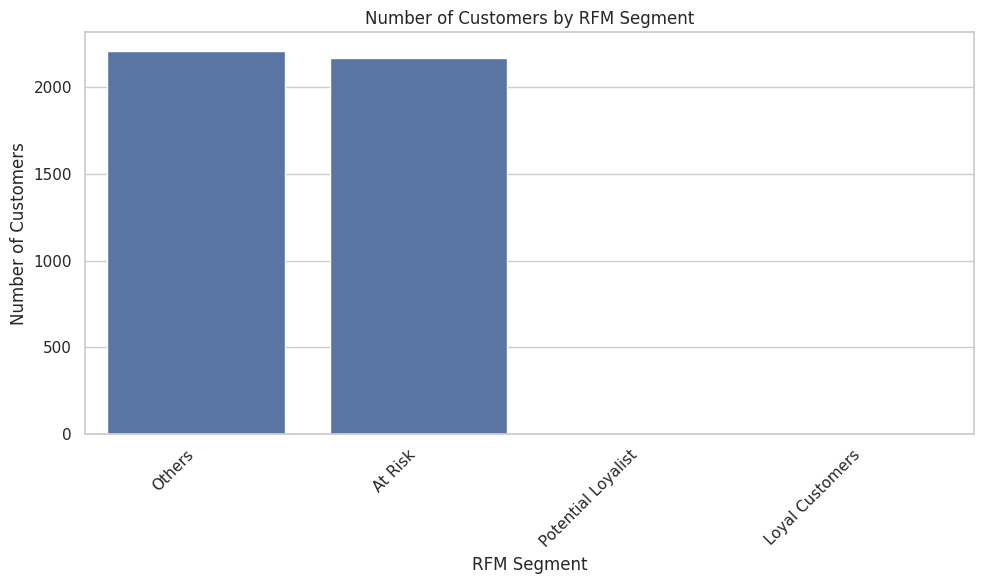

In [36]:
# Count of customers by segment
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index)
plt.title('Number of Customers by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 6.3 Gráfico de Dispersión: Frequency vs Monetary

Visualizaremos la relación entre la frecuencia y el gasto, diferenciando por segmento.

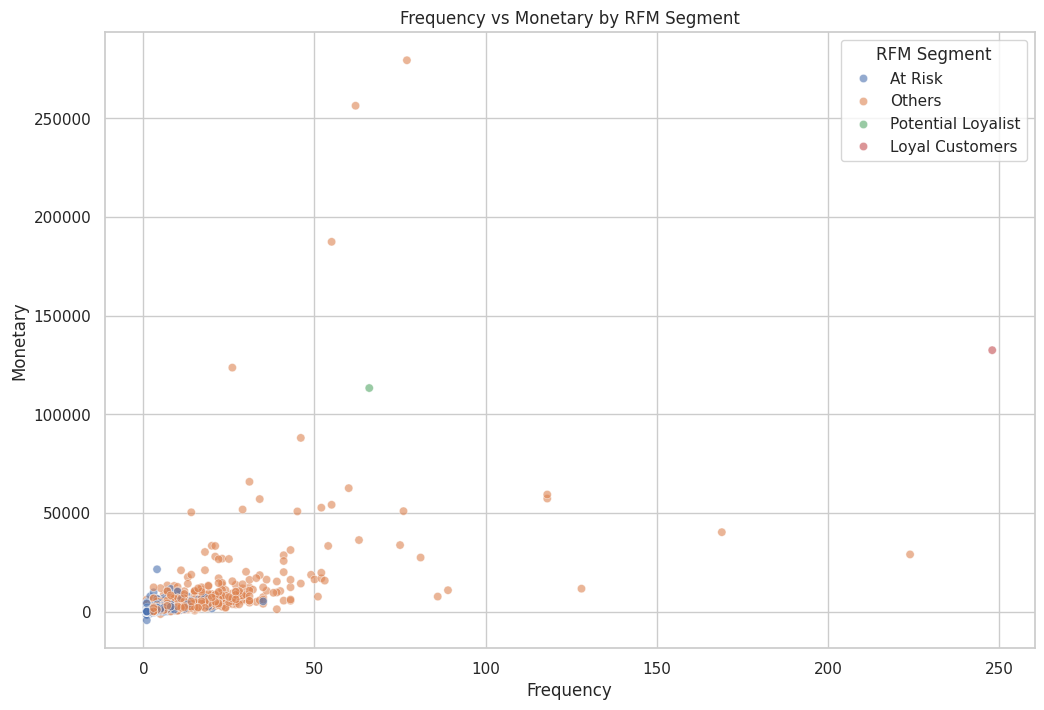

In [39]:
# Scatter plot of Frequency vs Monetary, colored by Segment
plt.figure(figsize=(12, 8))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Segment', alpha=0.6)
plt.title('Frequency vs Monetary by RFM Segment')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend(title='RFM Segment')
plt.grid(True)
plt.show()

## 7. Conclusiones y Próximos Pasos

En este taller hemos:

1. **Preparado y limpiado los datos**: Se simuló un DataFrame, se convirtieron las fechas y se creó la columna `TotalPrice`.
2. **Calculado las métricas RFM** para cada cliente.
3. **Asignado puntajes** a cada métrica utilizando cuartiles.
4. **Definido segmentos** de clientes basados en los puntajes.
5. **Visualizado** la distribución de las métricas y los segmentos.

Utiliza estos resultados para diseñar estrategias de marketing específicas para cada segmento (por ejemplo, campañas de retención para los clientes "At Risk" o programas VIP para los "Champions").

¡Felicidades por completar el taller!

| **Segmento**                    | **Características Principales**                                                            | **Estrategia Táctica de Retención**                                                                                                                                                                                 | **Canales de Ejecución**                                                        |
| ------------------------------- | ------------------------------------------------------------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------- |
| 🧨 **Clientes en Riesgo**       | - Alta recencia (hace mucho no compran)<br>- Frecuencia moderada<br>- Bajo valor monetario | - Enviar **bonos especiales de recompra** vía email y WhatsApp.<br>- Activar **campañas de remarketing personalizadas**.<br>- Ofrecer **doble puntaje en el programa de lealtad** por volver antes de cierta fecha. | Email marketing, WhatsApp Business, Remarketing digital                         |
| 🌱 **Potential Loyalists**      | - Buena frecuencia y gasto medio<br>- Aún no alcanzan nivel de lealtad plena               | - Invitar al **programa de puntos y recompensas**.<br>- Dar **descuento exclusivo en la próxima compra**.<br>- Implementar **retargeting dinámico** con productos complementarios.                                  | Redes sociales, Email marketing, Retargeting, Landing page personalizada        |
| 💎 **Loyal Customers**          | - Alta frecuencia<br>- Gasto sostenido<br>- Relación constante con la marca                | - Ofrecer **productos exclusivos** solo para su nivel.<br>- Crear **club privado de fidelización**.<br>- Incentivar **programas de referidos** y reconocimiento público.                                            | Email personalizado, App de fidelización, Landing exclusiva, Social media       |
| 🏆 **Champions (Clientes VIP)** | - Alta recencia, frecuencia y gasto<br>- Clientes más valiosos y fieles                    | - Implementar **gamificación**: insignias digitales y logros visibles.<br>- Entregar **beneficios VIP** y regalos personalizados.<br>- Motivar a **compartir su estatus en redes sociales**.                        | Plataforma de fidelización, Notificaciones push, Redes sociales, CRM gamificado |
